['CutFlow;1', 'CollectionTree;1', 'MetaData;1']
1722


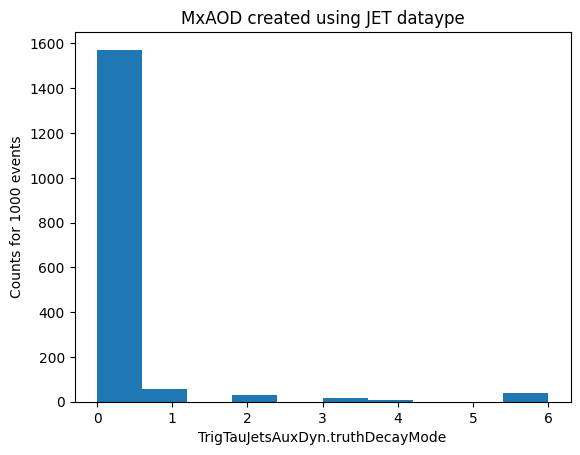

In [7]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

branch_name = 'TrigTauJetsAuxDyn.truthDecayMode'
# branch_name = 'TruthTausAuxDyn.IsHadronicTau'
# file = uproot.open("/afs/cern.ch/user/a/asudhaka/eos_space/THOR/MxAODCreator/valid1TAUtype.root")
file = uproot.open("/afs/cern.ch/user/a/asudhaka/eos_space/THOR/MxAODCreator/valid1.root")

# Inspect the available keys (like a directory structure)
print(file.keys())

# Access a specific tree
tree = file["CollectionTree"]  # replace "tree_name" with the actual name of your tree

# List branches
with open('output.txt', 'w') as f:
    for branch in tree.keys():
        f.write(branch + '\n')

# Get data for a specific branch
data = np.asarray(tree[branch_name]) 
data = np.concatenate(data).ravel()


print(len(data))
# For a simple histogram

plt.hist(data)
plt.xlabel(branch_name) 
plt.ylabel('Counts for 1000 events')
plt.title('MxAOD created using JET dataype')
plt.savefig('JET_dtype.png')
plt.show()

In [9]:
import uproot
import glob

# Specify the folder path where the MxAOD files are located
# folder_path = "/afs/cern.ch/user/a/asudhaka/eos_space/GN_tau/GNTau_samples/THOR_samples/user.asudhaka.TauID.801166.Py8EG_A14NNPDF23LO_jj_JZ1_v3_output.root"
folder_path = "/afs/cern.ch/user/a/asudhaka/eos_space/THOR/MxAODCreator"

# Get a list of all the MxAOD files in the folder
file_list = glob.glob(folder_path + "/*.root")

# Initialize the event count
jet_count = 0

# Loop through each file
for file_path in file_list:
    # Open the file
    file = uproot.open(file_path)

    # Access the tree
    tree = file["CollectionTree"]

    # Get the data for the 'TauJets.pt' branch
    data = tree["TrigTauJetsAuxDyn.pt"].array()

    # Update the event count
    jet_count += len(data)

# Print the total event count
print("Total number of jets:", jet_count)

# 857 - with JET datatype
# 121 - with TAU datatype


Total number of jets: 978
